In [2]:
# unzipimg files in the folder <data> to their own new folders
import zipfile
import os

data_folder = 'data'

# List all files in the data folder
for filename in os.listdir(data_folder):
    if filename.endswith('.zip'):
        zip_path = os.path.join(data_folder, filename)
        extract_path = os.path.join(data_folder, os.path.splitext(filename)[0]) # Extract to a folder named after the zip file
        # Create the extraction directory
        os.makedirs(extract_path, exist_ok=True)

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Unzipped {filename} to {extract_path}")

Unzipped lau1-current-iz.shp.zip to data\lau1-current-iz.shp
Unzipped UZIS.zip to data\UZIS


In [3]:
import pandas as pd

df_uzis = pd.read_csv("data/UZIS/data.csv")
display(df_uzis.head())

,year_visit,month_visit,okres_servise,specialization,okres_residence,icd10_category,number_of_visits
0,2016,7,CZ0642,705,CZ0635,120.0,14
1,2016,7,CZ0642,706,CZ0635,80.0,2
2,2016,7,CZ0642,706,CZ0635,106.0,8
3,2016,7,CZ0642,707,CZ0635,101.0,1
4,2016,7,CZ0642,708,CZ0635,53.0,2


In [4]:
print("Missing values in each category.")
display(df_uzis.isnull().sum())

# Creating the date column 'date'
df_uzis['date'] = df_uzis['year_visit'].astype(str) + "-" + df_uzis['month_visit'].astype(str).str.zfill(2)
df_uzis['date'] = pd.to_datetime(df_uzis['date'], format='%Y-%m')
col = df_uzis.pop('date')
df_uzis.insert(0, 'date', col)
df_uzis = df_uzis.drop(columns=['year_visit', 'month_visit'])

display(df_uzis.info())

Missing values in each category.


year_visit                0
month_visit               0
okres_servise        491426
specialization            0
okres_residence     4002484
icd10_category      2290405
number_of_visits          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100935305 entries, 0 to 100935304
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   okres_servise     object        
 2   specialization    int64         
 3   okres_residence   object        
 4   icd10_category    float64       
 5   number_of_visits  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.5+ GB


None

In [6]:
import geopandas as gpd

gdf_lau1 = gpd.read_file("data/lau1-current-iz.shp")
display(gdf_lau1.head())
display(gdf_lau1.info())

,PERIOD,LAU,NAME,REGISTERED,REGISTE_01,DISPONIBLE,LOW_EDUCAT,LONG_TERM,UNEMPLOYME,UNEMPLO_01,...,TOTAL,Y15-64,Y15-64-FEM,LOCAL_LAU,OSM_ID,ABBR,WIKIDATA,POPULATION,AREA_SQUAR,geometry
0,2024-01-01,CZ0100,Hlavní město Praha,28013.0,15719.0,25291.0,7550.0,8022.0,4718.0,4130.0,...,1357326,883418,443606,CZ0100,-439841.0,P,Q1085,2735.0,496.27,"POLYGON ((14.22444 50.103, 14.22447 50.10307, ..."
1,2024-01-01,CZ0201,Benešov,1506.0,797.0,1343.0,270.0,193.0,414.0,298.0,...,102228,63366,31159,CZ0201,-441521.0,BN,Q792883,69.0,1475.10,"POLYGON ((14.40337 49.75028, 14.40353 49.75121..."
2,2024-01-01,CZ0202,Beroun,2657.0,1465.0,2419.0,695.0,820.0,497.0,312.0,...,100517,63901,31520,CZ0202,-442335.0,BE,Q480085,143.0,703.67,"POLYGON ((13.7816 49.75982, 13.78181 49.76119,..."
3,2024-01-01,CZ0203,Kladno,5173.0,2780.0,4713.0,2251.0,2061.0,751.0,635.0,...,168708,107624,53501,CZ0203,-441012.0,KD,Q837635,234.0,719.74,"POLYGON ((13.86307 50.2486, 13.86311 50.24886,..."
4,2024-01-01,CZ0204,Kolín,3418.0,1958.0,3107.0,976.0,795.0,680.0,493.0,...,107268,67871,33085,CZ0204,-441315.0,KO,Q847318,143.0,747.91,"POLYGON ((14.73052 50.08684, 14.73066 50.08714..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   PERIOD      733 non-null    datetime64[ms]
 1   LAU         733 non-null    object        
 2   NAME        733 non-null    object        
 3   REGISTERED  733 non-null    float64       
 4   REGISTE_01  733 non-null    float64       
 5   DISPONIBLE  156 non-null    float64       
 6   LOW_EDUCAT  733 non-null    float64       
 7   LONG_TERM   536 non-null    float64       
 8   UNEMPLOYME  156 non-null    float64       
 9   UNEMPLO_01  156 non-null    float64       
 10  BELOW_25    733 non-null    float64       
 11  OVER_55     733 non-null    float64       
 12  POP_PERIOD  733 non-null    int32         
 13  TOTAL       733 non-null    int64         
 14  Y15-64      733 non-null    int64         
 15  Y15-64-FEM  733 non-null    int64         
 16  LOCAL_LAU   733 no

None

# Deskriptivní analýza časoprostorových trendů

Analysis of the total number of visits over time, distribution of visits by type of care (specialty), examination of the geographical distribution of visits, analysis of trends over time for different types of care and regions, identification of anomalies or significant changes in the data (e.g. in relation to COVID-19) and creation of basic visualizations (time series, bar plots, maps).

In [75]:
total_visits_per_date = df_uzis.groupby('date')['number_of_visits'].sum()
total_visits_per_specialization = df_uzis.groupby('specialization')['number_of_visits'].sum()
total_visits_per_service_region = df_uzis.groupby('okres_servise')['number_of_visits'].sum()
total_visits_per_residence_region = df_uzis.groupby('okres_residence')['number_of_visits'].sum()

# Series to DataFrame
total_visits_per_residence_region_df = total_visits_per_residence_region.reset_index()
total_visits_per_residence_region_df.columns = ['okres_residence', 'number_of_visits']

total_visits_per_service_region_df = total_visits_per_service_region.reset_index()
total_visits_per_service_region_df.columns = ['okres_servise', 'number_of_visits']

# Merge with gdf_lau1 on LAU code
total_visits_per_residence_region_df = total_visits_per_residence_region_df.merge(
    gdf_lau1[['LAU', 'NAME']],
    left_on='okres_residence',
    right_on='LAU',
    how='left'
)

total_visits_per_service_region_df = total_visits_per_service_region_df.merge(
    gdf_lau1[['LAU', 'NAME']],
    left_on='okres_servise',
    right_on='LAU',
    how='left'
)



In [53]:
display(total_visits_per_residence_region_df.head())
display(total_visits_per_service_region_df.head())  

,okres_residence,number_of_visits,LAU,NAME
0,CZ0100,35667577,CZ0100,Hlavní město Praha
1,CZ0101,3802750,NaN,NaN
2,CZ0102,6711414,NaN,NaN
3,CZ0103,10848172,NaN,NaN
4,CZ0104,58245379,NaN,NaN


,okres_servise,number_of_visits,LAU,NAME
0,CZ0101,25424017,NaN,NaN
1,CZ0102,46220439,NaN,NaN
2,CZ0103,15166276,NaN,NaN
3,CZ0104,71615970,NaN,NaN
4,CZ0105,66256856,NaN,NaN


In [76]:
total_visits_per_residence_region_df['NAME'] = total_visits_per_residence_region_df['NAME'].fillna('Hlavní město Praha')
total_visits_per_residence_region_df = total_visits_per_residence_region_df.drop(columns=['LAU'])

total_visits_per_service_region_df['NAME'] = total_visits_per_service_region_df['NAME'].fillna('Hlavní město Praha')
total_visits_per_service_region_df = total_visits_per_service_region_df.drop(columns=['LAU'])



In [ ]:
total_visits_per_residence_region_df = total_visits_per_residence_region_df.groupby('NAME', as_index=False).sum()
total_visits_per_service_region_df = total_visits_per_service_region_df.groupby('NAME', as_index=False).sum()

total_visits_per_service_region_df['okres_servise'] = total_visits_per_service_region_df['okres_servise'].replace(
    'CZ0101CZ0102CZ0103CZ0104CZ0105CZ0106CZ0107CZ0108CZ0109CZ010A', 'CZ0100'
    )
total_visits_per_residence_region_df['okres_residence'] = total_visits_per_residence_region_df['okres_residence'].replace(
    'CZ0100CZ0101CZ0102CZ0103CZ0104CZ0105CZ0106CZ0107CZ0108CZ0109CZ010A', 'CZ0100'
    )

# Checking the edited DataFrames
display(total_visits_per_residence_region_df)
display(total_visits_per_service_region_df)

,NAME,okres_residence,number_of_visits
0,Benešov,CZ0201,18786110
1,Beroun,CZ0202,19245709
2,Blansko,CZ0641,21440590
3,Brno-město,CZ0642,80195812
4,Brno-venkov,CZ0643,41099738
...,...,...,...
72,Česká Lípa,CZ0511,19287798
73,České Budějovice,CZ0311,36919042
74,Český Krumlov,CZ0312,10181631
75,Šumperk,CZ0715,24403303


,NAME,okres_servise,number_of_visits
0,Benešov,CZ0201,14777274
1,Beroun,CZ0202,15634100
2,Blansko,CZ0641,15721563
3,Brno-město,CZ0642,124393923
4,Brno-venkov,CZ0643,25088961
...,...,...,...
72,Česká Lípa,CZ0511,16907977
73,České Budějovice,CZ0311,46481441
74,Český Krumlov,CZ0312,6050061
75,Šumperk,CZ0715,21406900


In [ ]:
# Scraping the specializations from the website
# The specialization's are valid for 2025, there are some missing values (these codes are no longer used)
urls = [
    "https://szv.mzcr.cz/Ciselnik/Odbornost",
    "https://szv.mzcr.cz/Ciselnik/Odbornost/?page=2",
    "https://szv.mzcr.cz/Ciselnik/Odbornost/?page=3",
    "https://szv.mzcr.cz/Ciselnik/Odbornost/?page=4"
]

dfs = []
for url in urls:
    tables = pd.read_html(url)
    df = tables[0]
    dfs.append(df)

# Contatenate all DataFrames into one
df_specializations = pd.concat(dfs, ignore_index=True)

# Renaming columns for clarity
df_specializations = df_specializations.rename(columns={df_specializations.columns[0]: "id", df_specializations.columns[1]: "description"})
# Converting 'id' to integer type
df_specializations["id"] = df_specializations["id"].astype(int)
# Removing unnecessary columns
df_specializations = df_specializations.drop(columns = df_specializations.columns[2:])  

# output
display(df_specializations)

,id,description
0,1,všeobecné praktické lékařství
1,2,praktické lékařství pro děti a dorost a pediatrie
2,5,nemocniční lékárenství
3,6,klinická farmacie
4,8,hygiena a epidemiologie
...,...,...
173,926,domácí paliativní péče o pacienta v terminální...
174,927,ortoptista
175,931,dětská psychologie
176,935,ambulance s rozšířenou péčí


In [79]:
total_visits_per_specialization_df = total_visits_per_specialization.reset_index()
total_visits_per_specialization_df.columns = ['specialization', 'number_of_visits']
total_visits_per_specialization_df = total_visits_per_specialization_df.merge(
    df_specializations[['id', 'description']],
    left_on='specialization',
    right_on='id',
    how='left'
)
total_visits_per_specialization_df = total_visits_per_specialization_df.drop(columns=['id'])

In [80]:
display("Total visits per date:", total_visits_per_date.head(10))
display("Total visits per specialization:", total_visits_per_specialization_df)
display("Total visits per service region:", total_visits_per_service_region_df)
display("Total visits per residence region:", total_visits_per_residence_region_df)

'Total visits per date:'

date
2010-01-01    12355927
2010-02-01    12218163
2010-03-01    14194835
2010-04-01    13237750
2010-05-01    13107764
2010-06-01    13069352
2010-07-01     9787484
2010-08-01    10325190
2010-09-01    12057768
2010-10-01    12545565
Name: number_of_visits, dtype: int64

'Total visits per specialization:'

,specialization,number_of_visits,description
0,1,207208503,všeobecné praktické lékařství
1,2,59705814,praktické lékařství pro děti a dorost a pediatrie
2,3,5586299,NaN
3,4,315691,NaN
4,5,46,nemocniční lékárenství
...,...,...,...
133,925,9914312,domácí péče
134,926,62401,domácí paliativní péče o pacienta v terminální...
135,927,1022719,ortoptista
136,931,7235,dětská psychologie


'Total visits per service region:'

,NAME,okres_servise,number_of_visits
0,Benešov,CZ0201,14777274
1,Beroun,CZ0202,15634100
2,Blansko,CZ0641,15721563
3,Brno-město,CZ0642,124393923
4,Brno-venkov,CZ0643,25088961
...,...,...,...
72,Česká Lípa,CZ0511,16907977
73,České Budějovice,CZ0311,46481441
74,Český Krumlov,CZ0312,6050061
75,Šumperk,CZ0715,21406900


'Total visits per residence region:'

,NAME,okres_residence,number_of_visits
0,Benešov,CZ0201,18786110
1,Beroun,CZ0202,19245709
2,Blansko,CZ0641,21440590
3,Brno-město,CZ0642,80195812
4,Brno-venkov,CZ0643,41099738
...,...,...,...
72,Česká Lípa,CZ0511,19287798
73,České Budějovice,CZ0311,36919042
74,Český Krumlov,CZ0312,10181631
75,Šumperk,CZ0715,24403303


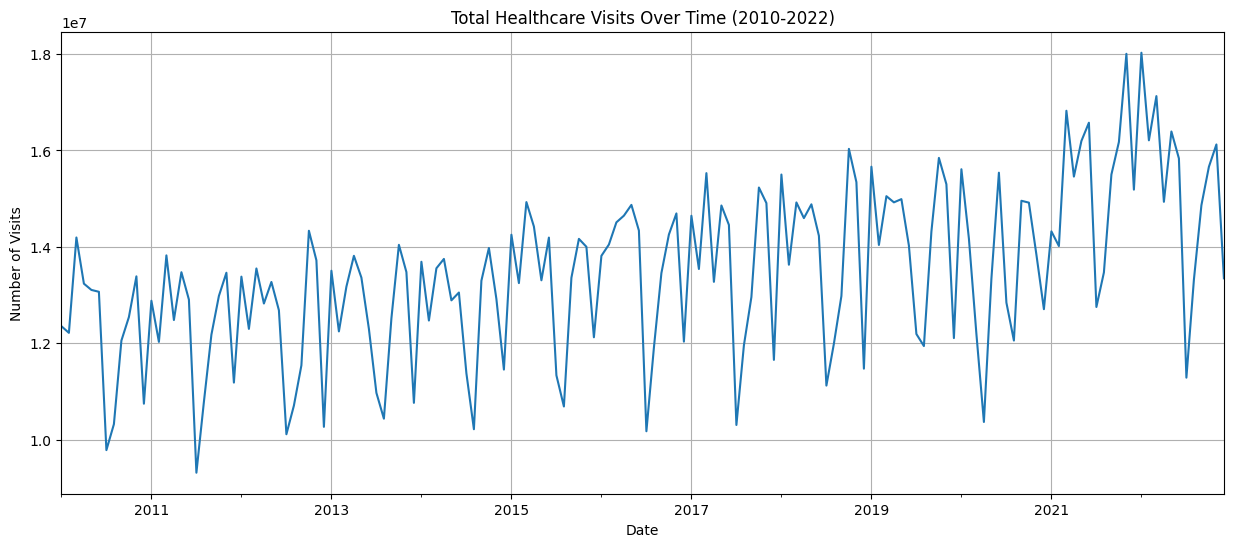

<Figure size 1500x600 with 0 Axes>

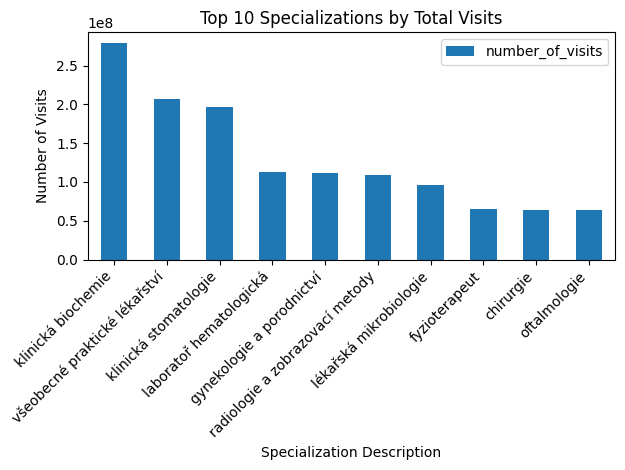

<Figure size 1500x600 with 0 Axes>

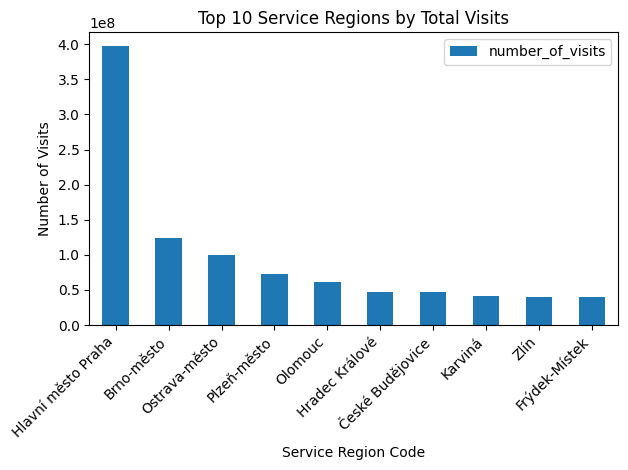

<Figure size 1500x600 with 0 Axes>

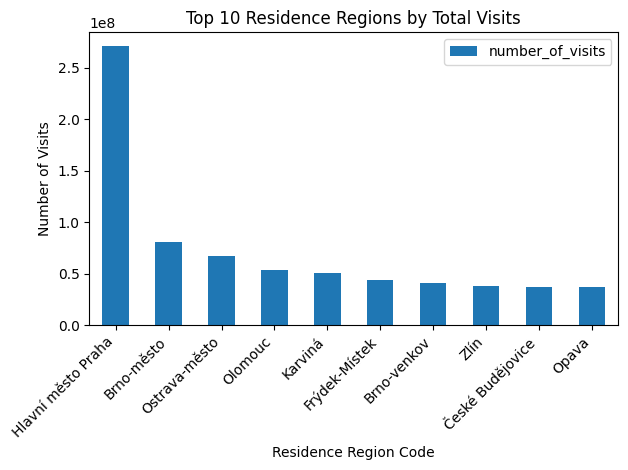

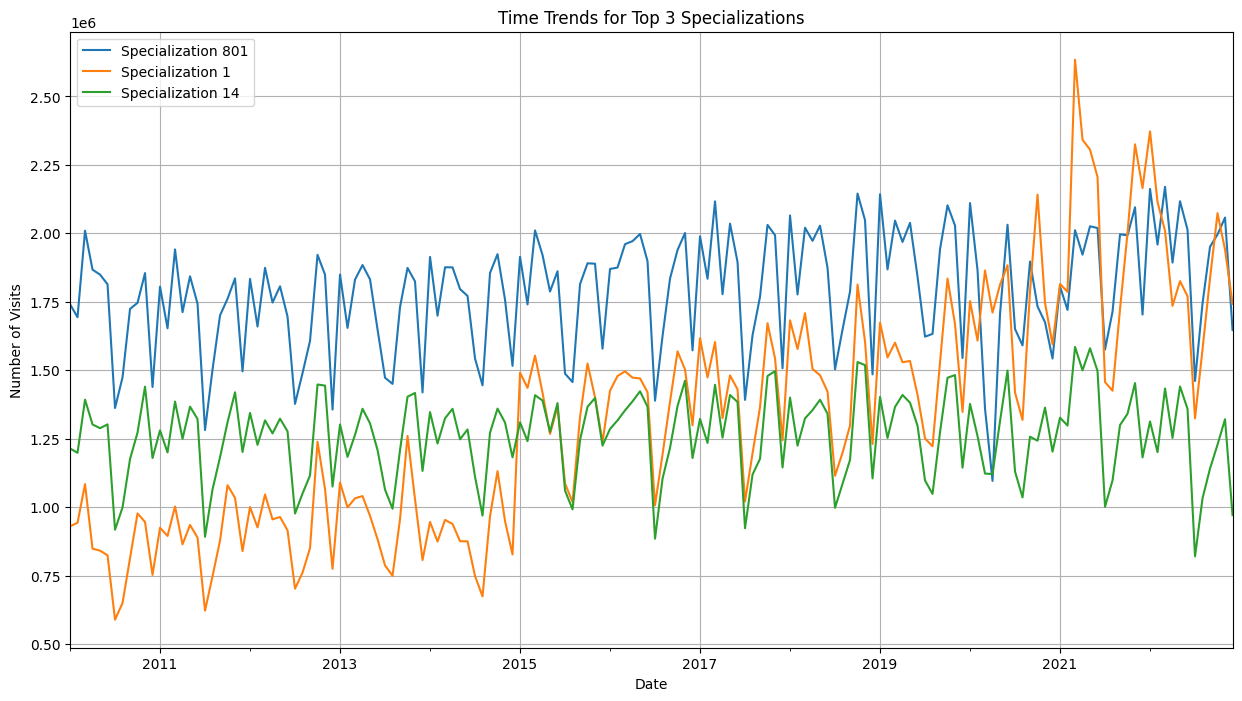

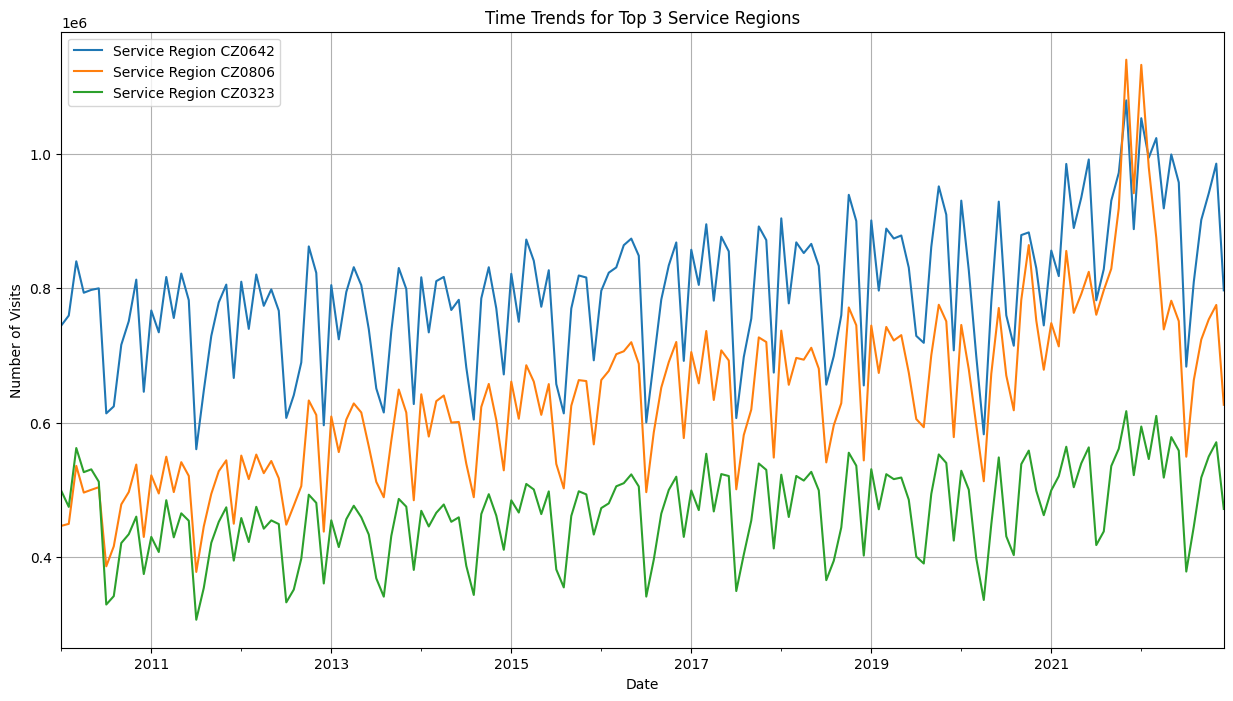

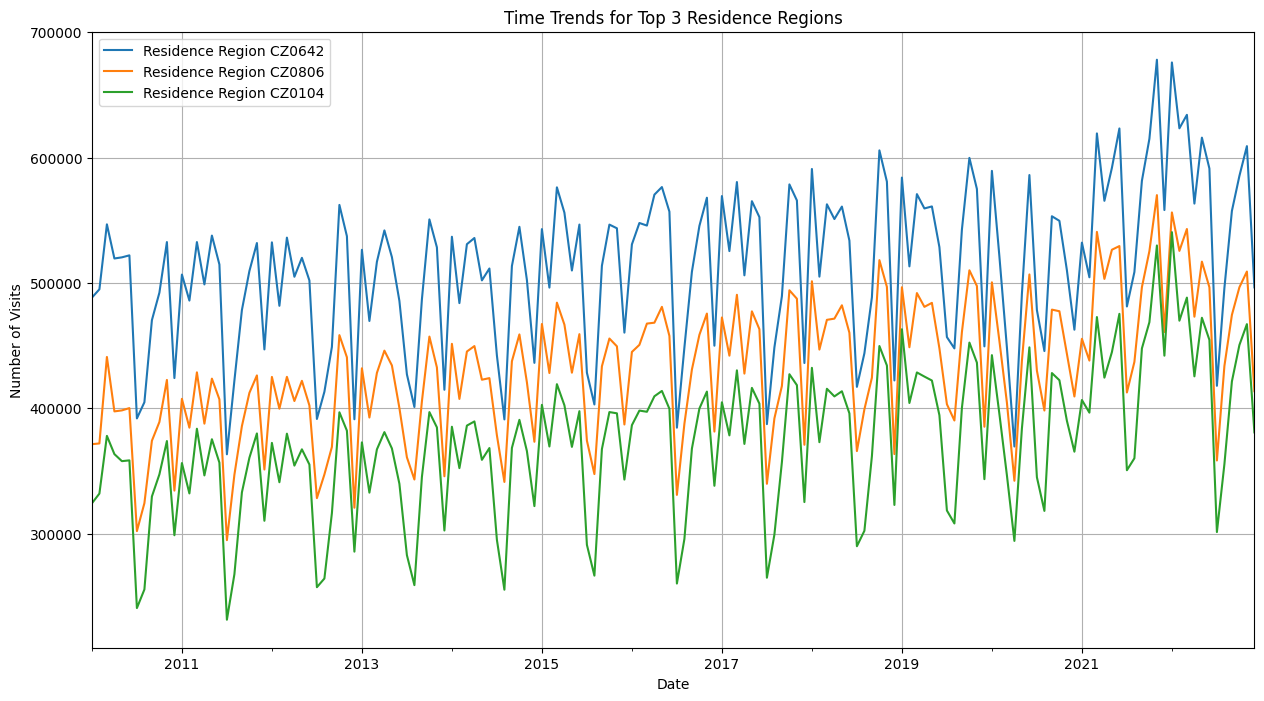

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Time series plot of total visits over time
plt.figure(figsize=(15, 6))
total_visits_per_date.plot()
plt.title('Total Healthcare Visits Over Time (2010-2022)')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.show()

# Step 2: Bar plots for distributions
# Distribution by Specialization (top 10 for clarity)
plt.figure(figsize=(15, 6))
total_visits_per_specialization_df.sort_values(by="number_of_visits", ascending=False).head(10).plot(x = 'description', 
                                                                                            y = 'number_of_visits', 
                                                                                            kind='bar')
plt.title('Top 10 Specializations by Total Visits')
plt.xlabel('Specialization Description')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution by Service Region (top 10 for clarity)
plt.figure(figsize=(15, 6))
total_visits_per_service_region_df.sort_values(by="number_of_visits", ascending=False).head(10).plot(x = 'NAME', 
                                                                                            y = 'number_of_visits',
                                                                                            kind='bar')
plt.title('Top 10 Service Regions by Total Visits')
plt.xlabel('Service Region Code')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution by Residence Region (top 10 for clarity)
plt.figure(figsize=(15, 6))
total_visits_per_residence_region_df.sort_values(by="number_of_visits", ascending=False).head(10).plot(x = 'NAME', 
                                                                                            y = 'number_of_visits',
                                                                                            kind='bar')
plt.title('Top 10 Residence Regions by Total Visits')
plt.xlabel('Residence Region Code')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 3: Analyze time trends for selected specializations (e.g., top 3)
top_specializations = total_visits_per_specialization.sort_values(ascending=False).head(3).index.tolist()
plt.figure(figsize=(15, 8))
for spec in top_specializations:
    df_uzis[df_uzis['specialization'] == spec].groupby('date')['number_of_visits'].sum().plot(label=f'Specialization {spec}')
plt.title('Time Trends for Top 3 Specializations')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.grid(True)
plt.show()

# Analyze time trends for selected regions (e.g., top 3 service regions)
top_service_regions = total_visits_per_service_region.sort_values(ascending=False).head(3).index.tolist()
plt.figure(figsize=(15, 8))
for region in top_service_regions:
    df_uzis[df_uzis['okres_servise'] == region].groupby('date')['number_of_visits'].sum().plot(label=f'Service Region {region}')
plt.title('Time Trends for Top 3 Service Regions')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.grid(True)
plt.show()

# Analyze time trends for selected regions (e.g., top 3 residence regions)
top_residence_regions = total_visits_per_residence_region.sort_values(ascending=False).head(3).index.tolist()
plt.figure(figsize=(15, 8))
for region in top_residence_regions:
    df_uzis[df_uzis['okres_residence'] == region].groupby('date')['number_of_visits'].sum().plot(label=f'Residence Region {region}')
plt.title('Time Trends for Top 3 Residence Regions')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.grid(True)
plt.show()

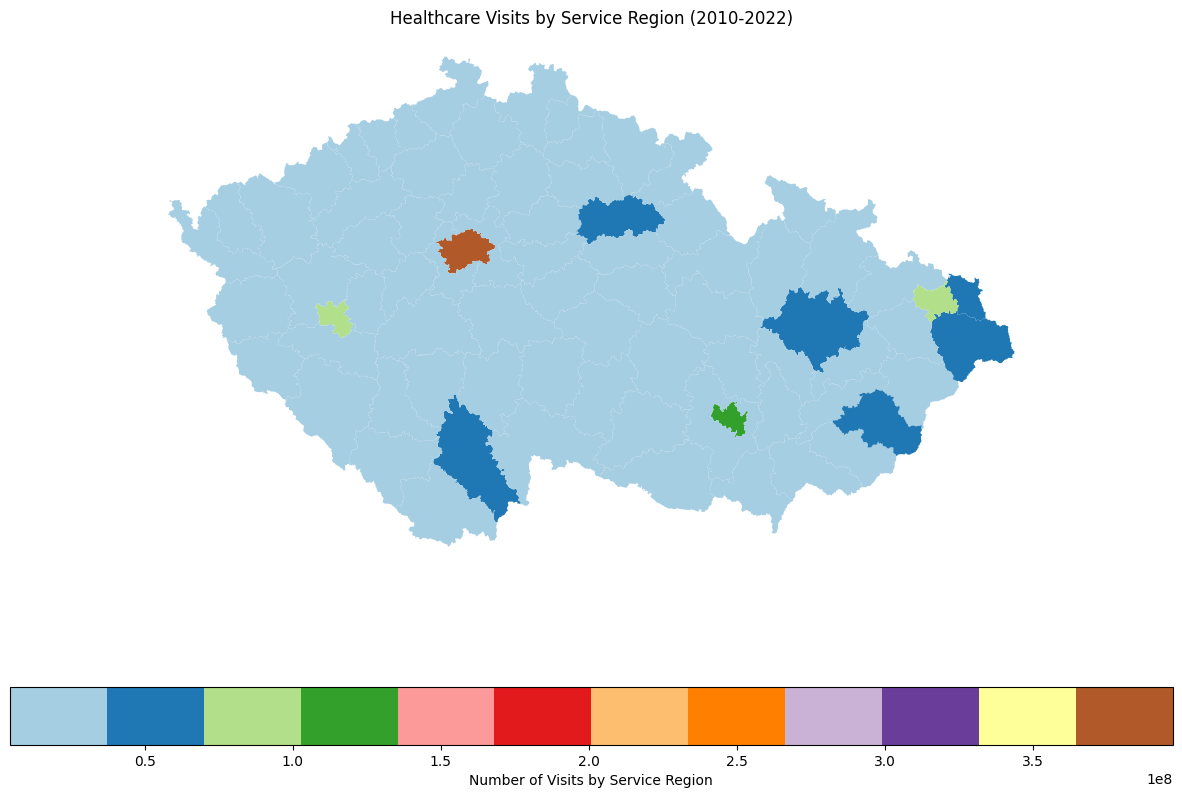

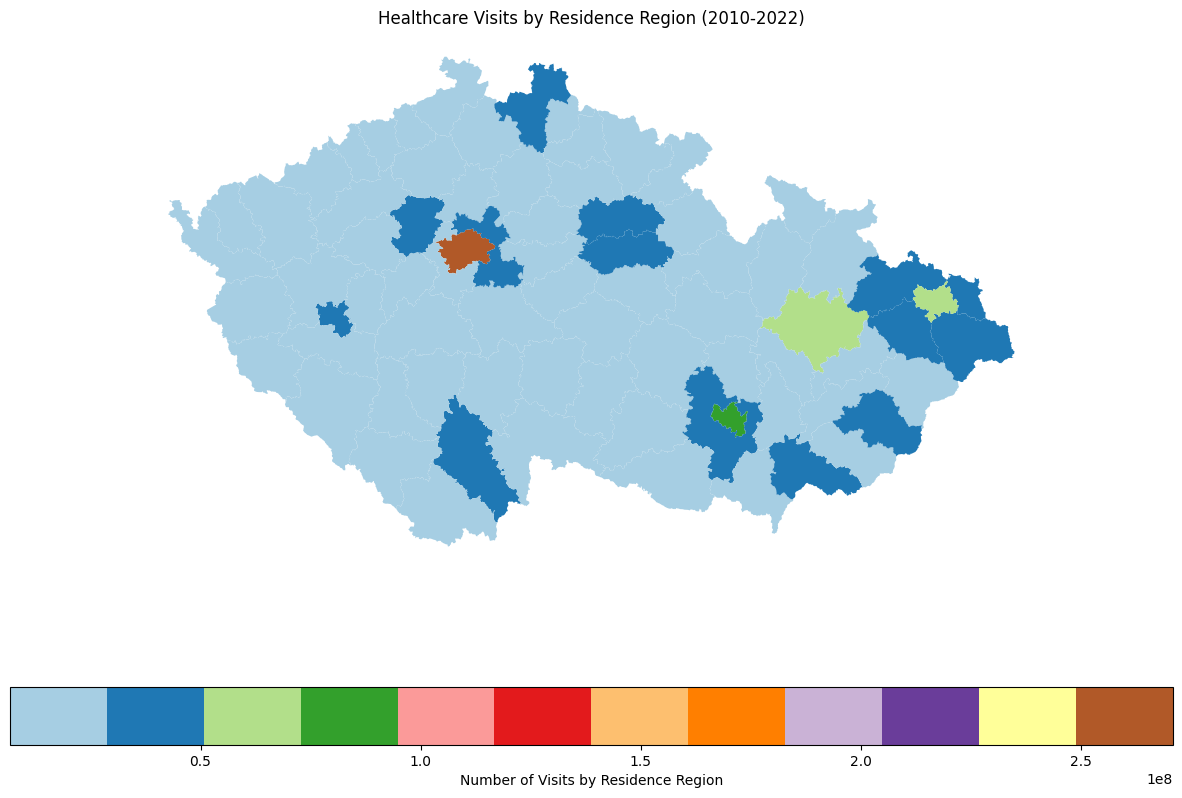

In [89]:
# Create basic choropleth maps
# Merge visit data with geographical data for service regions
gdf_service_visits = gdf_lau1.merge(total_visits_per_service_region_df, 
                                    left_on='LAU', 
                                    right_on = 'okres_servise', 
                                    how='left')

# Plot choropleth map for service region visits
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_service_visits.plot(column='number_of_visits', ax=ax, legend=True, cmap='Paired',
                        legend_kwds={'label': "Number of Visits by Service Region",
                                     'orientation': "horizontal"})
ax.set_title('Healthcare Visits by Service Region (2010-2022)')
ax.set_axis_off()
plt.show()

# Merge visit data with geographical data for residence regions
gdf_residence_visits = gdf_lau1.merge(total_visits_per_residence_region_df, 
                                      left_on='LAU', 
                                      right_on = 'okres_residence', 
                                      how='left')

# Plot choropleth map for residence region visits
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_residence_visits.plot(column='number_of_visits', ax=ax, legend=True, cmap='Paired',
                          legend_kwds={'label': "Number of Visits by Residence Region",
                                       'orientation': "horizontal"})
ax.set_title('Healthcare Visits by Residence Region (2010-2022)')
ax.set_axis_off()
plt.show()